## Import Data dan Inspeksi Dataset

In [15]:
# Import library dan baca dataset
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


## Cleansing Dataset

In [17]:
# Mengubah kolom 'First_Transaction' dan 'Last_Transaction'

df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


In [19]:
# Hapus kolom 'no' dan 'Row_num'
del(df['no'])
del(df['Row_Num'])

## Churn Customers

In [20]:
# Pengecekan transaksi terakhir dalam dataset
max(df['Last_Transaction'])

Timestamp('2019-02-01 23:57:57.286000128')

In [23]:
# Pengklasifikasian customer termasuk churn atau tidak
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
 6   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 5.3+ MB


In [24]:
# Mengubah value kolom is_churn menjadi numerik
df['is_churn'] = df['is_churn'].astype('int')
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,0
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,0
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,0
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,0


## Data Exploration

#### Pertanyaan 1: Bagaimana perkembangan customer dari tahun ke tahun?

In [26]:
# Membuat kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Membuat kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,0,2016,2018
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,0,2014,2018
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0,2017,2019
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,0,2017,2019
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,0,2015,2018


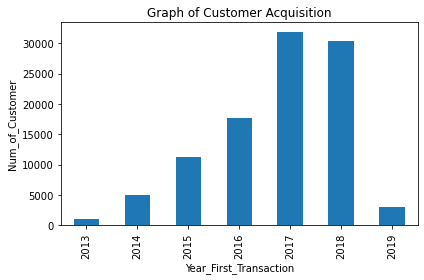

In [32]:
#Membuat grafik batang perkembangan customer
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind ='bar',  title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Customer acquisition adalah proses untuk menarik pelanggan agar membeli layanan yang kita tawarkan. Proses penarikan konsumen penting untuk perkembangan bisnis dalam jangka panjang. Berdasarkan grafik bar, terlihat bahwa jumlah penarikan customer yang tertinggi pada tahun 2017, sedangkan jumlah penarikan customer terendah terjadi pada tahun 2013. Kemudian terlihat juga bahwa setelah 2017 penarikan konsumen terus mengalami penurunan drastis dari tahun 2018 ke 2019. Hal ini harus diketahui penyebabnya oleh manajer toko mengapa jumlah penarikan konsumen terus menurun untuk membuat kebijakan agar proses penarikan konsumen meningkat kembali.

#### Pertanyaan 2: Bagaimana jumlah transaksi dari tahun ke tahun?

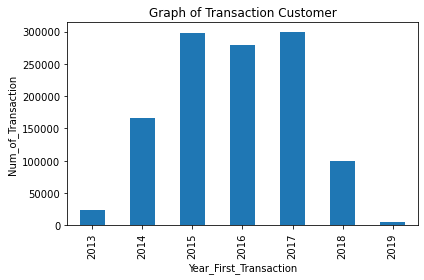

In [33]:
df_year = df.groupby(['Year_First_Transaction']).sum()['Count_Transaction']
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind ='bar',  title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

Berdasarkan grafik batang, jumlah transaksi dipengaruhi oleh jumlah konsumen dimana semakin besar jumlah konsumen, jumlah transaksi juga semakin besar. Jumlah transaksi terbesar terjadi pada 2015 dan 2017, kemudian menurun ketika tahun 2018 dan 2019.

#### Pertanyaan 3: Bagaimana trend penjualan setiap produk?

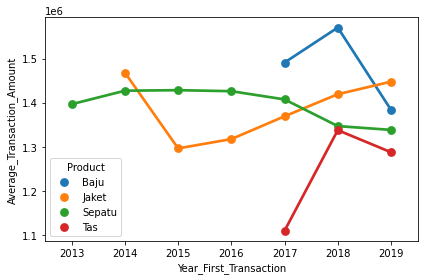

In [35]:
import seaborn as sns

plt.clf()
sns.pointplot(data = df.groupby(['Product','Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', y='Average_Transaction_Amount',hue='Product')
plt.tight_layout()
plt.show()

Berdasarkan trend penjualan produk dlihat dari rata-rara jumlah transaksi, produk jaket mengalami kenaikan jumlah transaksi dari tahun 2015-2019, sedangkan untuk produk baju, tas, dan sepatu cenderung mengalami penurunan

#### Pertanyaan 4: Bagaimana proporsi churn customer setiap produk?

<Figure size 432x288 with 0 Axes>

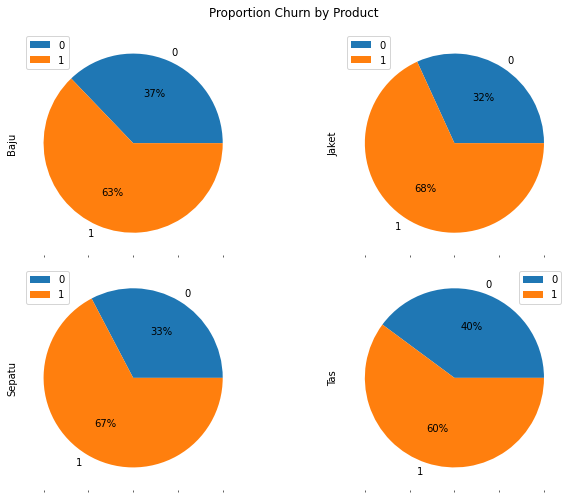

In [48]:
plt.clf()
# Melakukan pivot data
df_piv = df.pivot_table(index='is_churn',
                        columns='Product',
                        values='Customer_ID',
                        aggfunc='count',
                        fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

#Plot pie chart
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True, figsize=(10,7), layout=(-1,2), autopct='%1.0f%%',title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

Berdasarkan grafik pie, dimana 0 adalah pelanggan tetap dan 1 adalah churn, terlihat bahwa keseluruhan produk memiliki konsumen churn (sudah bukan pelanggan). Hal ini dapat diakibatkan karena ada konsumen yang sudah beralih dengan memberi produk lain atau membeli barang tersebut di toko lain. Proporsi konsumen churn (*churn rate customer*) sangat penting diketahui karena sangat mempengaruhi growth rate perusahaan.

Solusi yang bisa ditawarkan adalah dengan mencurahkan segala tenaga, biaya dan waktu untuk mempertahankan 32-40% pelanggan yang masih setia membeli produk di toko, sembari menyusun strategi marketing untuk menggenjot penjualan serta menambah pelanggan. Menurut **CleverTap**, memperoleh pelanggan baru secara umum akan membutuhkan biaya 5-25 kali lipat dibandingkan mempertahankan pelanggan setia. Oleh karena itu, manajer toko dapat membuat kebijakan yang dapat mempertahankan pelanggan tetap dan juga strategi untuk menarik pelanggan baru